<a href="https://colab.research.google.com/github/HrithikNambiar/COVID-19-Cough-Detection/blob/main/ComParE2021_CCS_Biomarker1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import glob

import librosa
import librosa.display

import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive',force_remount=True)
output_directory = '/content/drive/MyDrive'
input_directory = '/content/drive/MyDrive//ComParE2021/data/train'
csv_output_path="/content/drive/MyDrive/mfccunpadded.csv"
input_csv="/content/drive/MyDrive/ComParE2021/data/train.csv"
max=0
mfccunpadded=[]
fname=[]
 
 
df = pd.read_csv(input_csv)

for f in df['filename']:    
 x , sr = librosa.load(os.path.join(input_directory, f))
 if(x.shape[0]>max):
  max=x.shape[0]
# mfccs = librosa.feature.mfcc(x, sr=sr)
# mfccs=np.array(mfccs)
# mfccunpadded.append(mfccs)
 fname.append(f)
# print(f)


#final_df = pd.DataFrame({'filename': fname, 'mfcc':mfccunpadded})
#final_df.to_csv(csv_output_path, index=False)
#print(mfccunpadded.shape)
mfccpadded=[]
print(1)
csv_output_path="/content/drive/MyDrive/mfccpadded.csv"
 
for f in df['filename']:    
 x , sr = librosa.load(os.path.join(input_directory, f))
 x = np.pad(x, (0,max - len(x)), "constant")
 mfccs = librosa.feature.mfcc(x, sr=sr)
 mfccs=np.array(mfccs)
 mfccpadded.append(mfccs)
mfccpadded=np.array(mfccpadded)

print(mfccpadded[0])
#final_df = pd.DataFrame({'filename': fname, 'mfcc':mfccpadded})
#final_df.to_csv(csv_output_path, index=False)

Mounted at /content/drive
1
[[-351.39804   -344.02975   -346.3765    ... -787.84955   -787.84955
  -787.84955  ]
 [  65.0043      69.64607     75.137436  ...    0.           0.
     0.       ]
 [ -43.56997    -47.27554    -52.019073  ...    0.           0.
     0.       ]
 ...
 [ -12.803314   -12.131676    -7.5781283 ...    0.           0.
     0.       ]
 [   9.8125725    8.619486     6.1816616 ...    0.           0.
     0.       ]
 [  -2.3630157   -5.283459    -4.4862757 ...    0.           0.
     0.       ]]


In [ ]:
import os
import glob

import librosa
import librosa.display

import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive',force_remount=True)
output_directory = '/content/drive/MyDrive'
input_directory = '/content/drive/MyDrive/ComParE2021/data_2/test'

input_csv="/content/drive/MyDrive/ComParE2021/data_2/val.csv"

 
 
df = pd.read_csv(input_csv)

valmfccpadded=[]
i=0
for f in df['filename']:    
 x , sr = librosa.load(os.path.join(input_directory, f))
 x = np.pad(x, (0,max - len(x)), "constant")
 mfccs = librosa.feature.mfcc(x, sr=sr)
 mfccs=np.array(mfccs)
 valmfccpadded.append(mfccs)

valmfccpadded=np.array(valmfccpadded)

print(valmfccpadded[0])
#final_df = pd.DataFrame({'filename': fname, 'mfcc':mfccpadded})
#final_df.to_csv(csv_output_path, index=False)

Mounted at /content/drive
[[-4.9575681e+02 -4.8933411e+02 -4.9275375e+02 ... -6.3405914e+02
  -6.3405914e+02 -6.3405914e+02]
 [ 8.9419540e+01  9.0896179e+01  9.0001045e+01 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 4.6083444e-01 -3.4112825e+00 -1.4861749e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 ...
 [-5.7824082e+00 -7.2711015e+00 -8.2637711e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [-3.3994069e+00 -4.4327254e+00 -5.6406960e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [-7.3684301e+00 -6.6424651e+00 -7.9831858e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]]


In [ ]:
import os
import glob

import librosa
import librosa.display

import numpy as np
import pandas as pd

from google.colab import drive

In [ ]:
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


Biomarker1


In [ ]:
mfcc_b1=np.zeros_like(mfccpadded)
for i in range(mfccpadded.shape[0]):
    mfccpadded[i]=np.array(mfccpadded[i])
    pos=mfccpadded[i][mfccpadded[i]>=0]
    neg=mfccpadded[i][mfccpadded[i]<0]  
    lambpos=np.mean(pos)
    lambneg=np.mean(neg)     
    for j in range(mfccpadded.shape[1]):
      for k in range(mfccpadded.shape[2]):
        if (mfccpadded[i][j][k]>=0):
          mfcc_b1[i][j][k]=  mfccpadded[i][j][k]*np.random.poisson(lambpos,1)
        else: 
          mfcc_b1[i][j][k]=  mfccpadded[i][j][k]*np.random.poisson(-lambneg,1)


In [ ]:
valmfcc_b1=np.zeros_like(valmfccpadded)
for i in range(valmfccpadded.shape[0]):
    valmfccpadded[i]=np.array(valmfccpadded[i])
    pos=valmfccpadded[i][valmfccpadded[i]>=0]
    neg=valmfccpadded[i][valmfccpadded[i]<0]  
    lambpos=np.mean(pos)
    lambneg=np.mean(neg)     
    for j in range(valmfccpadded.shape[1]):
      for k in range(valmfccpadded.shape[2]):
        if (valmfccpadded[i][j][k]>=0):
          valmfcc_b1[i][j][k]=  valmfccpadded[i][j][k]*np.random.poisson(lambpos,1)
        else: 
          valmfcc_b1[i][j][k]=  valmfccpadded[i][j][k]*np.random.poisson(-lambneg,1)


In [ ]:
#IGNORE
mfcc_b2=[]

for i in range(len(mfccunpadded)):
    mfcc_b2.append(np.zeros_like(mfccunpadded[i]) )
    mfccunpadded[i]=np.array(mfccunpadded[i])
    pos=mfccunpadded[i][mfccunpadded[i]>=0]
    neg=mfccunpadded[i][mfccunpadded[i]<0]  
    lambpos=np.mean(pos)
    lambneg=np.mean(neg)     
    for j in range(mfccunpadded[i].shape[0]):
      for k in range(mfccunpadded[i].shape[1]):
        if (mfccunpadded[i][j][k]>=0):
          mfcc_b2[i][j][k]=  mfccunpadded[i][j][k]*np.random.poisson(lambpos,1)
        else: 
          mfcc_b2[i][j][k]=  mfccunpadded[i][j][k]*np.random.poisson(-lambneg,1)


In [ ]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [ ]:
#IGNORE
csv_output_path="/content/drive/MyDrive/mfccpadded.csv"
mfcccsv=[]
for i in range(mfccpadded.shape[0]):
  mfcccsv.append(mfcc_b1[i])
final_df = pd.DataFrame({'filename': fname, 'mfcc':mfcccsv})
final_df.to_csv(csv_output_path, index=False)

In [ ]:
#IGNORE
csv_output_path="/content/drive/MyDrive/mfccunpadded.csv"
final_df = pd.DataFrame({'filename': fname, 'mfcc':mfcc_b2})
final_df.to_csv(csv_output_path, index=False)

In [ ]:
train_X=np.array(mfcc_b1,dtype=float)
val_X=np.array(valmfcc_b1,dtype=float)

input_csv="/content/drive/MyDrive/ComParE2021/data/train.csv"
df = pd.read_csv(input_csv)
train_Y=np.array(df['label'])
train_Y[train_Y=='positive']=1
train_Y[train_Y=='negative']=0
train_Y=np.array(train_Y,dtype=float)

input_csv="/content/drive/MyDrive/ComParE2021/data_2/val.csv"
df = pd.read_csv(input_csv)
val_Y=np.array(df['label'])
val_Y[val_Y=='positive']=1
val_Y[val_Y=='negative']=0
val_Y=np.array(val_Y,dtype=float)
print(train_Y.shape[0])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_instances, num_time_steps, num_features = train_X.shape
train_X = train_X.reshape(-1, num_features)
train_X = scaler.fit_transform(train_X)
num_instances_val, num_time_steps, num_features = val_X.shape
val_X = val_X.reshape(-1, num_features)
val_X = scaler.fit_transform(val_X)

val_Y=val_Y.reshape(val_Y.shape[0],1)
train_Y=train_Y.reshape(train_Y.shape[0],1)
train_X=train_X.reshape(num_instances, num_time_steps, num_features,1)
val_X=val_X.reshape(num_instances_val, num_time_steps, num_features,1)


print(train_Y.shape)
print(val_Y.shape)
print(train_X.shape)
print(val_X.shape)


3304
(3304, 1)
(661, 1)
(3304, 20, 597, 1)
(661, 20, 597, 1)


MODEL 1 (RESNET50)

In [ ]:
import cv2
import numpy as np
import os

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

from keras.models import Sequential, Model,load_model
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
from google.colab.patches import cv2_imshow
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform

In [ ]:
def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

In [ ]:
def convolutional_block(X, f, filters, stage, block, s=2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a' , kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [ ]:
def ResNet50(input_shape):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(filters=64, kernel_size=(7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
   # X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
   # X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    #X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

In [ ]:

base_model = ResNet50(input_shape=[mfcc_b1.shape[1],mfcc_b1.shape[2],1])
#base_model.load_weights("/content/drive/MyDrive/ComParE2021/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5")


In [ ]:
headModel = base_model.output
headModel = Flatten()(headModel)
headModel=Dense(256, activation='relu',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel=Dense(128, activation='relu',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense( 1,activation='sigmoid',kernel_initializer=glorot_uniform(seed=0))(headModel)

In [ ]:
model = Model(inputs=base_model.input, outputs=headModel)

model.summary()

In [ ]:
model.set_weights(weights)

In [ ]:
 
import tensorflow as tf
def focal_loss(gamma=2., alpha=.25):
	def focal_loss_fixed(y_true, y_pred):
		pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
		pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
		return -K.mean(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1)) - K.mean((1 - alpha) * K.pow(pt_0, gamma) * K.log(1. - pt_0))
	return focal_loss_fixed
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(train_Y.reshape(train_Y.shape[0])),
                                                 train_Y.reshape(train_Y.shape[0]))
class_weights[0]=0.8
class_weights[0]=1.5
class_weight_dict = dict(enumerate(class_weights))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall(),keras.metrics.AUC()])
weights1 = model.get_weights()
#val_Y=np.reshape(val_Y.shape[0],1)

In [ ]:
print(class_weights)

[0.66398714 2.0245098 ]


In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.0002,
                              patience=3, min_lr=0.000001)
from tensorflow.keras.utils import Sequence
batch_size=30

#val_Y=np.reshape(val_Y.shape[0],1)
#val_X=np.reshape(val_X.shape[0],1)

history = model.fit(train_X,train_Y,
                                validation_data=(val_X,val_Y),
                                epochs=100,
                                verbose=2, 
                                #callbacks = [es],
                                callbacks=[reduce_lr],
                    class_weight=class_weight_dict
                    )
                                

Epoch 1/100
104/104 - 14s - loss: 0.8831 - accuracy: 0.7551 - precision_34: 0.5068 - recall_34: 0.3174 - auc_8: 0.7324 - val_loss: 0.4946 - val_accuracy: 0.8124 - val_precision_34: 0.0000e+00 - val_recall_34: 0.0000e+00 - val_auc_8: 0.5000
Epoch 2/100
104/104 - 9s - loss: 0.8448 - accuracy: 0.7476 - precision_34: 0.4855 - recall_34: 0.3701 - auc_8: 0.7576 - val_loss: 0.8583 - val_accuracy: 0.1876 - val_precision_34: 0.1876 - val_recall_34: 1.0000 - val_auc_8: 0.5000
Epoch 3/100
104/104 - 10s - loss: 0.8031 - accuracy: 0.7760 - precision_34: 0.5623 - recall_34: 0.4203 - auc_8: 0.7895 - val_loss: 0.9828 - val_accuracy: 0.1876 - val_precision_34: 0.1876 - val_recall_34: 1.0000 - val_auc_8: 0.5000
Epoch 4/100
104/104 - 10s - loss: 0.7700 - accuracy: 0.7854 - precision_34: 0.5822 - recall_34: 0.4645 - auc_8: 0.8105 - val_loss: 1.1698 - val_accuracy: 0.1876 - val_precision_34: 0.1876 - val_recall_34: 1.0000 - val_auc_8: 0.5000
Epoch 5/100
104/104 - 10s - loss: 0.7161 - accuracy: 0.8163 - pre

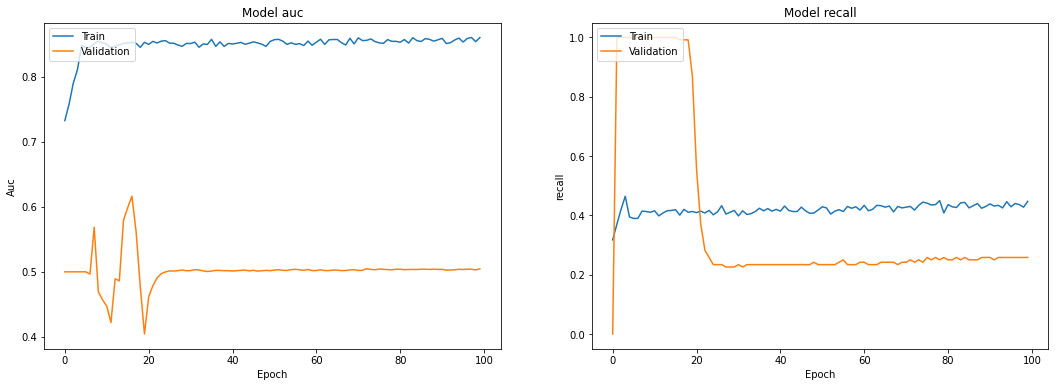

In [ ]:
import matplotlib.pyplot as plt
import glob
fig, axes = plt.subplots(1,2, figsize=(18, 6))
# Plot training & validation accuracy values
axes[0].plot(history.history['auc_8'])
axes[0].plot(history.history['val_auc_8'])
axes[0].set_title('Model auc')
axes[0].set_ylabel('Auc')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
axes[1].plot(history.history['recall_34'])
axes[1].plot(history.history['val_recall_34'])
axes[1].set_title('Model recall')
axes[1].set_ylabel('recall')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Validation'], loc='upper left')
plt.show()

MODEL 2(CNN)

In [ ]:
width=20
height=597
batch_size=20
num_epochs=15

In [ ]:
model = Sequential()

#Convol
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(width, height,1), data_format='channels_last'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=(2, 2)))


#Flatten
model.add(Flatten())

#Dense set 1
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

#Dense set 2
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())


#Output layer
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 18, 595, 128)      1280      
_________________________________________________________________
batch_normalization_42 (Batc (None, 18, 595, 128)      512       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 18, 595, 128)      147584    
_________________________________________________________________
batch_normalization_43 (Batc (None, 18, 595, 128)      512       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 9, 297, 128)       0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 9, 297, 128)       147584    
_________________________________________________________________
batch_normalization_44 (Batc (None, 9, 297, 128)      

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from sklearn.metrics import accuracy_score
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

import os

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)


history = model.fit((train_X,train_Y),
                                #steps_per_epoch=len(train_X) / batch_size,
                      validation_data=(val_X,val_Y),
                                #epochs=num_epochs,
                                #verbose=2, 
                                #callbacks = [es],
                                #callbacks=[reduce_lr]
                      )


In [ ]:
print(type(val_Y))
val_Y=np.array(val_Y)
print(np.sum(np.isnan(val_Y)))
print(train_X.shape)
print(train_Y.shape)
print(val_X.shape)
print(val_Y.shape)

In [ ]:
!pip install q keras==2.0.6

In [ ]:
pip install tensorflow-gpu==2.4.1